# Sweep Taper Length

> Find the S-matrix of a taper for different taper lengths

In [1]:
from typing import List

import matplotlib.pyplot as plt
import meow as mw
import numpy as np
from tqdm.notebook import tqdm

## Installation

```sh
pip install meow-sim
```

## Quick Start

### 1. Structure

In [2]:
def create_structures(length=10.0):
    oxide = mw.Structure(
        material=mw.silicon_oxide,
        geometry=mw.Prism(
            poly=np.array([(0, -2.1), (10, -2.1), (10, 2.1), (0, 2.1)]),
            h_min=-3,
            h_max=0,
            axis="y",
        ),
    )

    poly = np.array([(0, -0.45 / 2), (10, -1), (10, 1), (0, 0.45 / 2)])

    core = mw.Structure(
        material=mw.silicon,
        geometry=mw.Prism(
            poly=poly,
            h_min=0,
            h_max=0.22,
            axis="y",
        ),
    )

    structures = [oxide, core]
    return structures

In [3]:
mw.visualize(create_structures())

### 2. Cells

In [4]:
def create_cells(length=10.0, cell_length=1.0):
    num_cells = round(length / cell_length)
    structures = create_structures(length=length)
    cells = mw.create_cells(
        structures=structures,
        mesh=mw.Mesh2d(
            x = np.linspace(-2, 2, 101),
            y = np.linspace(-2, 2, 101),
            # specify possible conformal mesh specifications here:
            # bend_radius=2.0,
            # bend_axis=1,
        ),
        Ls=np.array([length / num_cells for _ in range(num_cells)]),
    )
    return cells

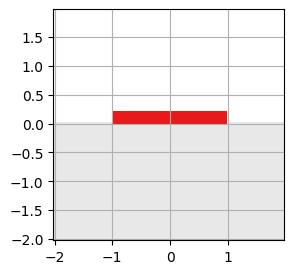

In [5]:
cells = create_cells()
mw.visualize(cells[-1])

### 3. Cross Sections


In [6]:
def create_cross_sections(length=10.0, cell_length=1.0, wl=1.55, T=25.0):
    cells = create_cells(length=length, cell_length=cell_length)
    env = mw.Environment(wl=1.55, T=25.0)
    css = [mw.CrossSection(cell=cell, env=env) for cell in cells]
    return css

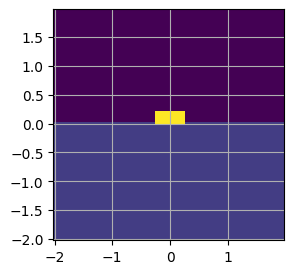

In [7]:
css = create_cross_sections()
mw.visualize(css[0])

### 4. Find Modes (FDE)

In [8]:
def find_modes(length=10.0, cell_length=1.0, wl=1.55, T=25.0, num_modes=10):
    css = create_cross_sections(length=length, cell_length=cell_length, wl=wl, T=T)
    modes: List[List[mw.Mode]] = []
    for cs in tqdm(css):
        modes_in_cs = mw.compute_modes(cs, num_modes=num_modes)
        modes.append(modes_in_cs)
    return modes

### 5. Calculate S-matrix (EME)

In [9]:
def find_s_matrix(length=10.0, cell_length=1.0, wl=1.55, T=25.0, num_modes=10):
    modes = find_modes(length=length, cell_length=cell_length, wl=wl, T=T, num_modes=num_modes)
    S, port_map = mw.compute_s_matrix(modes)
    return S, port_map

In [10]:
S1, pm1 = find_s_matrix(length=10.0)
S2, pm2 = find_s_matrix(length=5.0)

  0%|          | 0/10 [00:00<?, ?it/s]

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


  0%|          | 0/5 [00:00<?, ?it/s]

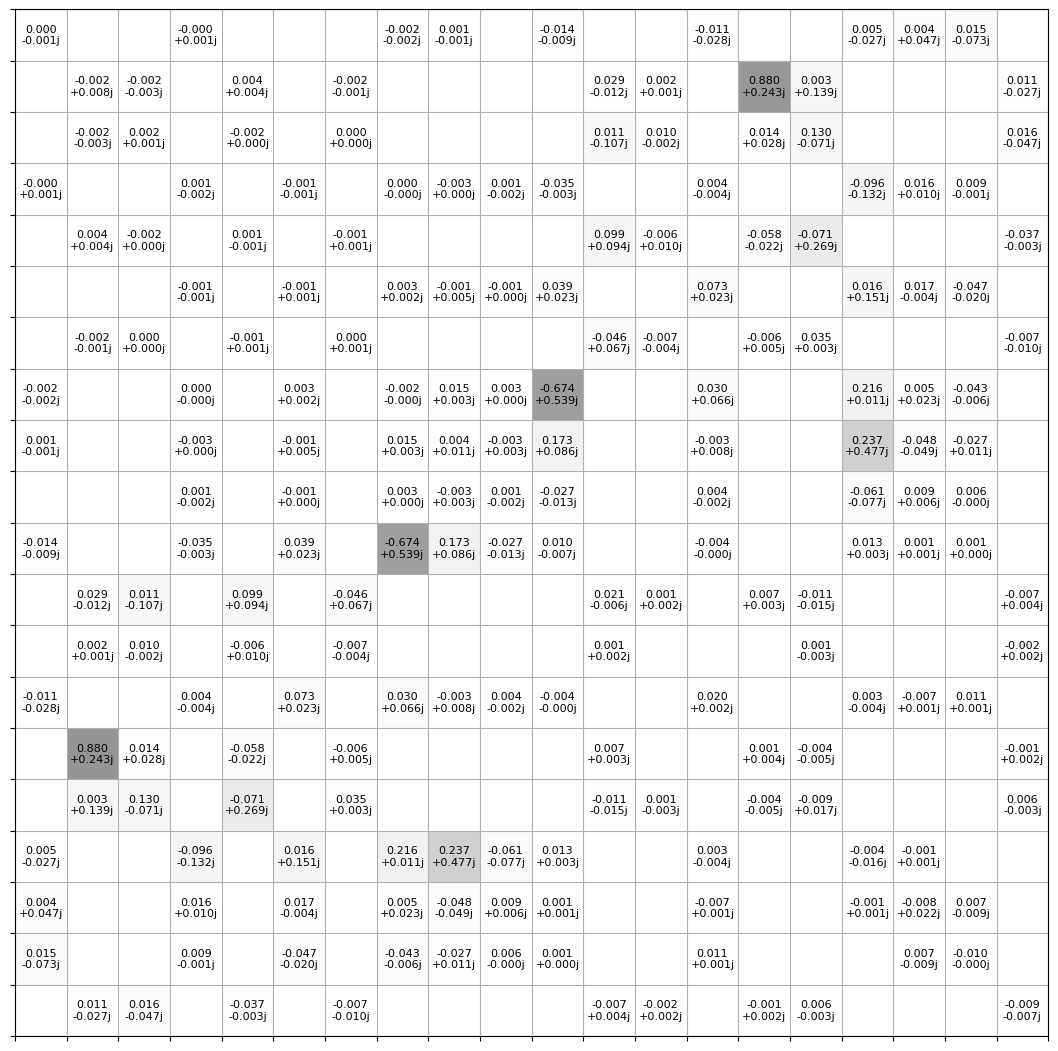

In [11]:
mw.visualize(S1)

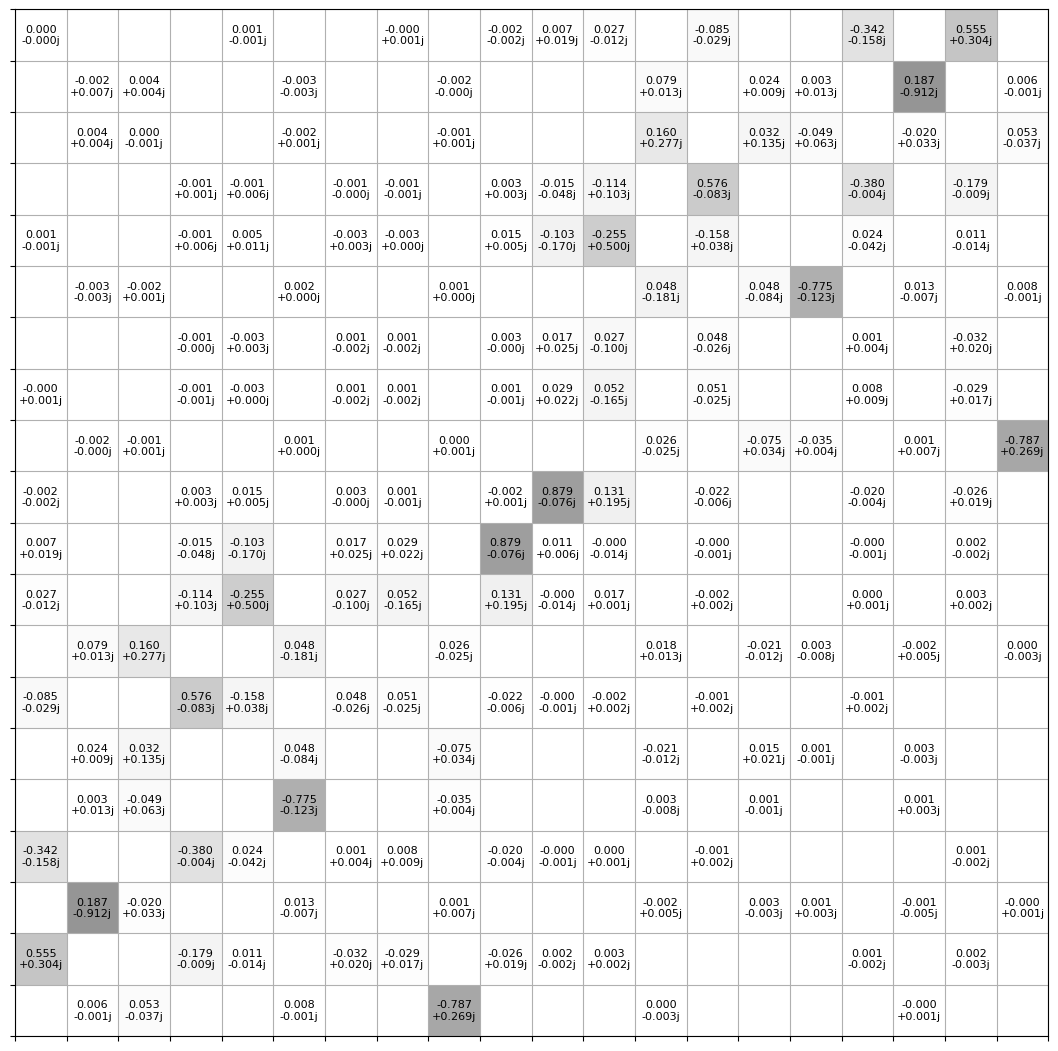

In [12]:
mw.visualize(S2)